In [370]:
import pandas  as pd
import numpy as np
import re
from sklearn.preprocessing import Imputer
from sklearn.feature_extraction.text import CountVectorizer
import collections
import matplotlib.pyplot as plt
# from matplotlib import pyplot as plt

plotly.tools.set_credentials_file(username='Thoffman', api_key = 'YvZGXnqfyl4j2Z7fG2Vl')



In [225]:
# #create data frame from file
df_DS1 = pd.read_csv('glassdoor_DS_AT.csv',encoding='utf8',error_bad_lines=False ,
                       names=['Title', 'Company','City', 'SalaryRange', 'Rating', 'JobDesc'])

df_DS1["City"]= "Atlanta, GA"

#create data frame from file
df_DS2 = pd.read_csv('glassdoor_DS_BOS1.csv',encoding='utf8',error_bad_lines=False ,
                       names=['Title', 'Company','City', 'SalaryRange', 'Rating', 'JobDesc'])
df_DS2["City"]= "Boston, MA"


#create data frame from file
df_DS3 = pd.read_csv('glassdoor_DS_CHI.csv',encoding='utf8',error_bad_lines=False ,
                       names=['Title', 'Company','City', 'SalaryRange', 'Rating', 'JobDesc'])

df_DS3["City"]= "Chicago, IL"

#create data frame from file
df_DS4 = pd.read_csv('glassdoor_DS_NY.csv',encoding='utf8',error_bad_lines=False ,
                       names=['Title', 'Company','City', 'SalaryRange', 'Rating', 'JobDesc'])


df_DS4 = df_DS4[df_DS4['City'].str.contains(", NY")]
df_DS4["City"]= "New York, NY"


#create data frame from file
df_DS5 = pd.read_csv('glassdoor_DS_PHI.csv',encoding='utf8',error_bad_lines=False ,
                       names=['Title', 'Company','City', 'SalaryRange', 'Rating', 'JobDesc'])

df_DS51 = df_DS5[df_DS5['City'].str.contains("PA")]

df_DS51["City"]= "Philadelphia, PA"
#--------------#

df_DS52 = df_DS5[df_DS5['City'].str.contains("NC")]

df_DS52['City']= 'Raleigh, NC'


#create data frame from file
df_DS6 = pd.read_csv('glassdoor_DS_SEAT.csv',encoding='utf8',error_bad_lines=False ,
                       names=['Title', 'Company','City', 'SalaryRange', 'Rating', 'JobDesc'])

df_DS6['City']="Seattle, WA"

# #create data frame from file
df_DS7 = pd.read_csv('glassdoor_DS_SF2.csv',encoding='utf8',error_bad_lines=False ,
                       names=['Title', 'Company','City', 'SalaryRange', 'Rating', 'JobDesc'])
df_DS7["City"]= "San Francisco, CA"


#create data frame from file
df_DS8 = pd.read_csv('glassdoor_DS_STDIE.csv',encoding='utf8',error_bad_lines=False ,
                       names=['Title', 'Company','City', 'SalaryRange', 'Rating', 'JobDesc'])

list81 = ['San Diego, CA', 'La Jolla, CA']

df_DS81 = df_DS8[df_DS8['City'].isin(['San Diego, CA', 'La Jolla, CA'])]
df_DS81['City']= 'San Diego, CA'

df_DS82 =df_DS8[~df_DS8['City'].isin(['San Diego, CA', 'La Jolla, CA','Portland, OR', 'Vancouver, WA','Frisco, TX'])]#not in 

df_DS82['City']= 'Los Angeles, CA'


df_DS83 = df_DS8[df_DS8['City'].str.contains("Portland")]


#create data frame from file
df_DS9 = pd.read_csv('glassdoor_DS_WDC.csv',encoding='utf8',error_bad_lines=False ,
                       names=['Title', 'Company','City', 'SalaryRange', 'Rating', 'JobDesc'])
df_DS9['City']='Washington, DC'


#create data frame from file
df_DS10 = pd.read_csv('glassdoor_DS_DEN.csv',encoding='utf8',error_bad_lines=False ,
                       names=['Title', 'Company','City', 'SalaryRange', 'Rating', 'JobDesc'])

df_DS10 = df_DS10[df_DS10['City'].str.contains("Denver")]


#create data frame from file
df_DS11 = pd.read_csv('glassdoor_DS_DAL2.csv',encoding='utf8',error_bad_lines=False ,
                       names=['Title', 'Company','City', 'SalaryRange', 'Rating', 'JobDesc'])

df_DS11 = df_DS11[df_DS11['City'].str.contains("Dallas")]

frames = [df_DS1,df_DS2,df_DS3,df_DS4,df_DS51,df_DS52,df_DS6,df_DS7,df_DS81,df_DS82,df_DS83,df_DS9,df_DS10,df_DS11]
results = pd.concat(frames)
# results.City.unique()
# results.count()
results




/Users/tuba/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/tuba/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/tuba/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:66: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/s

,Title,Company,City,SalaryRange,Rating,JobDesc
0,Data Scientist,"Equifax – Atlanta, GA","Atlanta, GA",$67k-$101k(Glassdoor est.),3.2,Equifax empowers businesses and consumers with...
1,Data Scientist,"Cox Automotive – Atlanta, GA","Atlanta, GA",$92k-$132k(Glassdoor est.),3.5,"Description\nCox Automotive, is currently look..."
2,Data Scientist,"State Farm – Dunwoody, GA","Atlanta, GA",$89k-$129k(Glassdoor est.),3.2,Requisition ID:\nreq1913\n\nJob Title:\nData S...
3,Data Scientist,"Verizon – Alpharetta, GA","Atlanta, GA",$88k-$127k(Glassdoor est.),3.5,What youll be doing...\n\nBe a part of the tea...
4,Data Scientist,"Amazon – Atlanta, GA","Atlanta, GA",$94k-$136k(Glassdoor est.),3.8,MULTIPLE POSITIONS AVAILABLE: Support senior m...
5,Data Scientist,"Search Discovery – Atlanta, GA","Atlanta, GA",NaN,4.5,About Search Discovery\n\nSearch Discovery is ...
6,Data Scientist - AWS Professional Services,"Amazon – Atlanta, GA","Atlanta, GA",$94k-$136k(Glassdoor est.),3.8,Excited by using massive amounts of data to de...
7,"Data Scientist, Online","Home Depot – Atlanta, GA","Atlanta, GA",$94k-$141k(Glassdoor est.),3.5,Position Description:\nPosition Purpose:\nAt H...
8,Data Scientist,"Market Strategies, Inc. – Atlanta, GA","Atlanta, GA",NaN,3.3,Data Scientist\n\nMarket Strategies Internatio...
9,Data Scientist,"Xebia – Atlanta, GA","Atlanta, GA",$73k-$111k(Glassdoor est.),3.8,Data Scientist\n\nYou will be responsible for\...


In [226]:
# df_DS4 = pd.read_csv('glassdoor_DS_NY.csv',encoding='utf8',error_bad_lines=False ,
#                        names=['Title', 'Company','City', 'SalaryRange', 'Rating', 'JobDesc'])

# df_DS4 = df_DS4[df_DS4['City'].str.contains(", NY")]
# df_DS4["City"]= "New York, NY"

# df_DS4.City.unique()

results.City.unique()





array(['Atlanta, GA', 'Boston, MA', 'Chicago, IL', 'New York, NY',
       'Philadelphia, PA', 'Raleigh, NC', 'Seattle, WA',
       'San Francisco, CA', 'San Diego, CA', 'Los Angeles, CA',
       'Portland, OR', 'Washington, DC', 'Denver, CO', 'Dallas, TX'], dtype=object)

In [86]:
#save all files to one csv file
#results.to_csv('merged_glassdoor.csv')

In [227]:
# print(results[results['Title'].str.contains('Data Scientist')].count())
# print(results[results['Title'].str.contains('Data Science')].count())
# print(results[results['Title'].str.contains('Data Engineer')].count())
# print(results[results['Title'].str.contains('Big Data')].count())


results_data_sci = results[results['Title'].str.contains('Data Scientist')]
results_data_sci2 = results[results['Title'].str.contains('Data Science')]
results_data_en = results[results['Title'].str.contains('Data Engineer')]
results_data_big = results[results['Title'].str.contains('Big Data')]

# results_data_sci.count()
# results_data_sci2.count()
# results_data_en.count()

#Create data for different title groups Data Scientist, Data Engineer, Big Data
results_data_sci["ClassTitle"] = 'Data Scientist'
results_data_sci2["ClassTitle"]= "Data Scientist"
results_data_en["ClassTitle"] = "Data Engineer"
results_data_big["ClassTitle"] = "Big Data"



/Users/tuba/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/tuba/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/tuba/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/s

In [234]:
# print(results_data_sci.head())
# print('----------------------')
# print(results_data_en.head())
# print('-----------------------')
# print(results_data_big)


results.City.unique()


array(['Atlanta, GA', 'Boston, MA', 'Chicago, IL', 'New York, NY',
       'Philadelphia, PA', 'Raleigh, NC', 'Seattle, WA',
       'San Francisco, CA', 'San Diego, CA', 'Los Angeles, CA',
       'Portland, OR', 'Washington, DC', 'Denver, CO', 'Dallas, TX'], dtype=object)

In [233]:
#merged data again for comparison chart

frames_2 = [results_data_sci,results_data_sci2,results_data_en,results_data_big]
results = pd.concat(frames_2)



In [235]:
print(results_data_en.count())
print(results_data_sci.count())

Title          685
Company        685
City           685
SalaryRange    505
Rating         648
JobDesc        677
ClassTitle     685
dtype: int64
Title          1953
Company        1953
City           1953
SalaryRange    1454
Rating         1758
JobDesc        1924
ClassTitle     1953
dtype: int64


In [238]:
results.City.unique()

array(['Atlanta, GA', 'Boston, MA', 'Chicago, IL', 'New York, NY',
       'Philadelphia, PA', 'Raleigh, NC', 'Seattle, WA',
       'San Francisco, CA', 'San Diego, CA', 'Los Angeles, CA',
       'Portland, OR', 'Washington, DC', 'Denver, CO', 'Dallas, TX'], dtype=object)

In [237]:
#replace the characters in salary range column
results['SalaryRange'].replace('Glassdoor est.','', inplace=True, regex = True)
results['SalaryRange'].replace(r"\(.*\)",'', inplace=True, regex = True)

#create min/max salary columns using SalaryRange column
results[['minsal','maxsal']] = (results.SalaryRange.str.replace('-',' ').str.extract(r'(.*)\s+([^\s]*)', expand=True))

#select only numbers
results['minsal']= results['minsal'].str.extract('(\d+)')
results['maxsal']= results ['maxsal'].str.extract('(\d+)')

/Users/tuba/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)

/Users/tuba/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



In [239]:


# #Fix the Company column , remove the city/state
results[['Company']] = results['Company'].str.replace(',',' ')
results[['Company']] = results['Company'].str.replace(' ','')
results[['CompanyName','z']]=(results.Company.str.replace('–',' ').str.extract(r'(.*)\s+([^\s]*)', expand=True))

#drop junk column
results =results.drop('z', axis=1)

# #results.head()

# #convert max and min sal columns  from string to float
cols = ['minsal','maxsal']
results[cols] = results[cols].replace(',','.', regex=True).astype(float)

In [241]:



print('--------------')
print(results.head())

print('---Fit inputer---')
# Create an imputer object that looks for 'Nan' values, then replaces them with the mean value of the feature by columns (axis=0)
mean_imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)
print(mean_imputer)

# Train the imputor on the df dataset
mean_imputer = mean_imputer.fit(results[cols])

print('----------imputing-------------')
# Apply the imputer to the df dataset (2 columns)
imputed_df = mean_imputer.transform(results[cols].values)

#update sal columns with imputed array
results[cols] = imputed_df



--------------
            Title                  Company         City SalaryRange  Rating  \
0  Data Scientist        Equifax–AtlantaGA  Atlanta, GA  $67k-$101k     3.2   
1  Data Scientist  CoxAutomotive–AtlantaGA  Atlanta, GA  $92k-$132k     3.5   
2  Data Scientist     StateFarm–DunwoodyGA  Atlanta, GA  $89k-$129k     3.2   
3  Data Scientist     Verizon–AlpharettaGA  Atlanta, GA  $88k-$127k     3.5   
4  Data Scientist         Amazon–AtlantaGA  Atlanta, GA  $94k-$136k     3.8   

                                             JobDesc      ClassTitle  minsal  \
0  Equifax empowers businesses and consumers with...  Data Scientist    67.0   
1  Description\nCox Automotive, is currently look...  Data Scientist    92.0   
2  Requisition ID:\nreq1913\n\nJob Title:\nData S...  Data Scientist    89.0   
3  What youll be doing...\n\nBe a part of the tea...  Data Scientist    88.0   
4  MULTIPLE POSITIONS AVAILABLE: Support senior m...  Data Scientist    94.0   

   maxsal    CompanyName  
0 

In [242]:

print('---imputing with most frequent class ---')
# Create Imputer object
imputer = Imputer(strategy='most_frequent', axis=0)
my_arr = results['Rating'].values.reshape(-1, 1)

# Fill missing values with most frequent class
imputer_rat =imputer.fit_transform(my_arr)

results['Rating']=imputer_rat




---imputing with most frequent class ---


In [243]:
# round the salary columns after imputing null columns
results.minsal = results.minsal.round()
results.maxsal = results.maxsal.round()
#results

In [244]:
#distinct companies
results.City.unique()


array(['Atlanta, GA', 'Boston, MA', 'Chicago, IL', 'New York, NY',
       'Philadelphia, PA', 'Raleigh, NC', 'Seattle, WA',
       'San Francisco, CA', 'San Diego, CA', 'Los Angeles, CA',
       'Portland, OR', 'Washington, DC', 'Denver, CO', 'Dallas, TX'], dtype=object)

In [19]:
print(results.head())
#results.to_csv("results.csv")

            Title                  Company         City SalaryRange  Rating  \
0  Data Scientist        Equifax–AtlantaGA  Atlanta, GA  $67k-$101k     3.2   
1  Data Scientist  CoxAutomotive–AtlantaGA  Atlanta, GA  $92k-$132k     3.5   
2  Data Scientist     StateFarm–DunwoodyGA  Atlanta, GA  $89k-$129k     3.2   
3  Data Scientist     Verizon–AlpharettaGA  Atlanta, GA  $88k-$127k     3.5   
4  Data Scientist         Amazon–AtlantaGA  Atlanta, GA  $94k-$136k     3.8   

                                             JobDesc      ClassTitle  minsal  \
0  Equifax empowers businesses and consumers with...  Data Scientist    67.0   
1  Description\nCox Automotive, is currently look...  Data Scientist    92.0   
2  Requisition ID:\nreq1913\n\nJob Title:\nData S...  Data Scientist    89.0   
3  What youll be doing...\n\nBe a part of the tea...  Data Scientist    88.0   
4  MULTIPLE POSITIONS AVAILABLE: Support senior m...  Data Scientist    94.0   

   maxsal    CompanyName  
0   101.0        

In [245]:
#remove null values from Job Desc to use for word freq
df_desc = results[pd.notnull(results['JobDesc'])]


In [246]:
df_desc.count()

Title          3565
Company        3565
City           3565
SalaryRange    2363
Rating         3565
JobDesc        3565
ClassTitle     3565
minsal         3565
maxsal         3565
CompanyName    3565
dtype: int64

In [288]:
#create vector to find freq of the some key words
word_vectorizer = CountVectorizer(ngram_range=(1,2), analyzer='word',token_pattern=r"\b\w+\b")
sparse_matrix = word_vectorizer.fit_transform(df_desc['JobDesc'])




In [512]:
frequencies = sum(sparse_matrix).toarray()[0]
df_freq=  pd.DataFrame(frequencies,index=word_vectorizer.get_feature_names(), columns=['frequency'])

In [290]:
df_freq.reset_index()
df_freq['word'] = df_freq.index

In [510]:

prog_list = ['java','scala','python','redshift','aws','spark','pig',
             'cloud','django','hadoop','mapreduce', 'linux', 'ruby','nosql','mangodb','github','machine learning',
             'ai','big data','ruby','sas','shiny','google',
             'finance','healthcare','startup','master','phd', 'r','mathematics', 'statistics', 'physics', 'engineering']
#degree_list = ['phd','Phd','master','MS','Bcs','BS']

#print(df_freq.head())
# df_freq[''] = df_freq['url'].str.lower()

df_freq[df_freq['word'].isin(prog_list)]

print(df_freq[df_freq.word.str.startswith(('r'))])
#df_freq[df_freq['word'].isin(degree_list)]
#df_freq[df_freq['word'].isin(prog_list)].to_csv('glassdoor_freq_tbl.csv')


                         frequency                     word
r                             2326                        r
r 1                              1                      r 1
r 1151                           1                   r 1151
r 120                            1                    r 120
r 2                              3                      r 2
r 3                              3                      r 3
r 5                              2                      r 5
r _                              1                      r _
r a                             12                      r a
r ability                        8                r ability
r able                           1                   r able
r advanced                       1               r advanced
r although                       1               r although
r amazon                         2                 r amazon
r an                             1                     r an
r and                          239      

In [511]:
sorted_list = df_freq[df_freq['word'].isin(prog_list)]
sorted_list =sorted_list.sort_values('frequency', ascending=False)
# sorted_list.to_csv('glassdoor_freq_tbl_fin.csv')

In [293]:
sorted_list

,frequency,word
machine learning,4596,machine learning
big data,3952,big data
python,3263,python
r,2326,r
hadoop,2302,hadoop
spark,2010,spark
cloud,1786,cloud
java,1525,java
aws,1234,aws
scala,980,scala


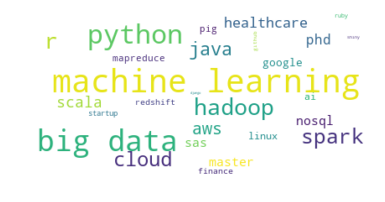

In [297]:
#WordCloud for the most used key words in Job description for Data Scientist and Data Science
d = {}
for a, x in sorted_list.values:
    d[x] = a

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white")
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


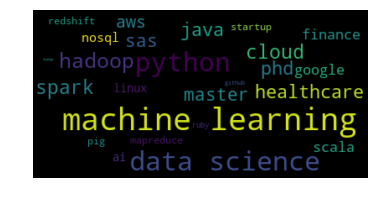

In [82]:
#WordCloud for the most used key words in Job description for Data Scientist and Data Science
d = {}
for a, x in sorted_list.values:
    d[x] = a

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [213]:

#import plotly.plotly as py
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected =True)

In [248]:
#results_copy = results
results["AvgSal"] = (results['minsal']+results['maxsal'])/2
results.AvgSal = results.AvgSal.round()
# results.head()
results.City.unique()


array(['Atlanta, GA', 'Boston, MA', 'Chicago, IL', 'New York, NY',
       'Philadelphia, PA', 'Raleigh, NC', 'Seattle, WA',
       'San Francisco, CA', 'San Diego, CA', 'Los Angeles, CA',
       'Portland, OR', 'Washington, DC', 'Denver, CO', 'Dallas, TX'], dtype=object)

In [500]:
results.AvgSal.mean()

120.41927443921351

In [216]:
results.describe()

,Rating,minsal,maxsal,AvgSal
count,3611.000000,3611.000000,3611.000000,3611.000000
mean,3.723096,101.114096,140.054556,120.419274
std,0.546617,23.109129,30.645675,26.424623
min,1.000000,24.000000,42.000000,33.000000
25%,3.400000,90.000000,126.000000,108.000000
50%,3.600000,101.000000,140.000000,120.000000
75%,4.000000,106.000000,148.000000,127.000000
max,5.000000,372.000000,418.000000,395.000000


In [ ]:


df1 = df_data_sci.drop_duplicates(subset=['Title','Company','City','SalaryRange', 'Rating','CompanyName',  ])
df1.count()

In [501]:
df_data_sci = results[results['ClassTitle']=='Data Scientist']
df_data_sci.describe()


,Rating,minsal,maxsal,AvgSal
count,2360.000000,2360.000000,2360.000000,2360.000000
mean,3.715339,101.786441,145.280085,123.369492
std,0.543217,21.738361,29.326941,25.439634
min,1.000000,29.000000,43.000000,36.000000
25%,3.400000,91.000000,134.000000,112.000000
50%,3.600000,101.000000,140.000000,120.000000
75%,4.000000,108.000000,156.000000,132.000000
max,5.000000,207.000000,306.000000,256.000000


In [220]:
#df_data_sci[pd.notnull(df_data_sci['CompanyName'])]

In [497]:
df_data_sci.shape

(2360, 11)

In [ ]:
# comp_count_list = df_data_sci['CompanyName'].value_counts()
# #Rating,Company,Salary
rating_df = df_data_sci[['CompanyName','Rating','AvgSal']]
rating_df  = rating_df.drop_duplicates(['CompanyName','Rating','AvgSal'])
#filter_value_max = rating_df['Rating'] > 4

rating_df = rating_df.sort_values(by =['Rating','AvgSal'], ascending = [False, False])
rating_df



In [503]:
#Scatter plot - Rating Salary distrubutions
#import plotly as py
from plotly.graph_objs import *
plotly.tools.set_credentials_file(username='Thoffman', api_key = 'YvZGXnqfyl4j2Z7fG2Vl')


trace1 = Scatter(
#  
        x = rating_df.Rating,
        y= rating_df.AvgSal,
        mode='markers',
        marker= Marker(
        opacity= 0.5
            
        )
    )
data = Data([trace1])
#py.offline.plot(data,filename='scatter_plot_rat.html')
py.plot(data,filename='scatter_plot_rat.html')

'https://plot.ly/~Thoffman/9'

In [506]:

max_sal_by_city = df_data_sci[['City','maxsal']]
max_sal_by_city =max_sal_by_city.groupby(['City']).max().sort_values(by='maxsal',ascending =False)


min_sal_by_city = df_data_sci[['City','minsal']]
min_sal_by_city =min_sal_by_city.groupby(['City']).min()

avg_sal_by_city = df_data_sci[['City','AvgSal']]
avg_sal_by_city = avg_sal_by_city.groupby(['City']).mean().round()

##Salary by company
max_sal_by_comp = df_data_sci[['CompanyName','maxsal','minsal']]
max_sal_by_comp = max_sal_by_comp.groupby(['CompanyName']).max().sort_values(by='maxsal',ascending =False)

# max_sal_by_comp.drop(['GoogleInc.'], inplace=True)

max_sal_by_comp= max_sal_by_comp.head(20)#.sort_values(by='maxsal',ascending =False)
max_sal_by_comp


min_sal_by_comp = df_data_sci[['CompanyName','maxsal','minsal']]
min_sal_by_comp = min_sal_by_comp.groupby(['CompanyName']).max().sort_values(by='minsal',ascending =True)
#min_sal_by_comp = min_sal_by_comp.drop_duplicates(['CompanyName','maxsal','minsal'])
min_sal_by_comp


,maxsal,minsal
CompanyName,,
SystemsPlanningandAnalysisInc.,43.0,29.0
SystemsPlanningandAnalysisInc,43.0,29.0
Lionsgate,60.0,37.0
MatchGroup,64.0,38.0
TheJointCommission,78.0,46.0
Intrexon,62.0,46.0
MetroStarSystems,73.0,47.0
EagleViewTechnologies,72.0,48.0
Q1TechnologiesInc.,70.0,49.0


In [507]:
import plotly.plotly as py
import plotly.graph_objs as go

plotly.tools.set_credentials_file(username='Thoffman', api_key = 'YvZGXnqfyl4j2Z7fG2Vl')
trace1 = go.Bar(
    y= max_sal_by_comp.index,
    x= max_sal_by_comp.minsal,
    name='Min Salary',
    orientation = 'h',
    marker = dict(
        color = 'rgba(246, 78, 139, 0.6)',
        line = dict(
            color = 'rgba(246, 78, 139, 1.0)',
            width = 3)
    )
)
trace2 = go.Bar(
    
    y= max_sal_by_comp.index,
    x= max_sal_by_comp.maxsal,
    name='Max Salary',
    orientation = 'h',
    marker = dict(
        color = 'rgba(60, 71, 80, 0.6)',
        line = dict(
            color = 'rgba(60, 71, 80, 1.0)',
            width = 3)
        
    )
)


data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    xaxis=dict(title='(in thousands)'),
    yaxis=dict(title ='',tickangle = 60)
    
)

fig = go.Figure(data=data, layout=layout)
#py.iplot(fig, filename='marker-h-bar.thml')
py.plot(fig,filename='styled_bar.html')

'https://plot.ly/~Thoffman/6'

In [498]:
df_data_sci.City.value_counts()

New York, NY         442
San Francisco, CA    388
Washington, DC       318
Chicago, IL          196
Seattle, WA          196
Boston, MA           193
Los Angeles, CA      167
Atlanta, GA          106
Philadelphia, PA      88
Raleigh, NC           78
Denver, CO            58
Dallas, TX            51
San Diego, CA         47
Portland, OR          32
Name: City, dtype: int64

In [508]:

import plotly.plotly as py
#import plotly
import plotly.graph_objs as go
#plotly.offline.init_notebook_mode(connected =True)


trace_minsal = go.Bar(x=min_sal_by_city.index,
                  y=min_sal_by_city.minsal, #df_data_sci.minsal,
                  name='MinSal',
                  marker=dict(color='#ffcdd2'))

trace_maxsal = go.Bar(x=max_sal_by_city.index,
                y=max_sal_by_city.maxsal,
                name='MaxSal',
                marker= dict(color='#A2D5F2'))

trace_avgsal =  go.Bar(x=avg_sal_by_city.index,
                y=avg_sal_by_city.AvgSal,
                name='AvgSal',
                marker=dict(color='#59606D'))

data = [trace_maxsal,trace_minsal, trace_avgsal]

layout = go.Layout(title="Salaries by City",
                xaxis=dict(title='City'),
                yaxis=dict(title='Salary (in thousands)')
                 )              

fig = go.Figure(data=data, layout=layout)
#print(fig)
#plotly.offline.plot(fig, filename='styled_bar.html')
py.plot(fig,filename='styled_bar2.html')

'https://plot.ly/~Thoffman/13'

In [59]:
import plotly as py
import plotly.graph_objs as go

x = ['Data Scientist', 'Data Engineer', 'Big Data']

y = [2400, 685, 526]


data = [go.Bar(
            x=x,
            y=y,
            text=y,
            textposition = 'auto',
            marker=dict(
            color='rgb(158,202,225)',
            line=dict(
            color='rgb(8,48,107)',
            width=1.5),
            ),
            opacity=0.6
        )]

py.offline.plot(data, filename='bar-direct-labels.html')

'file:///Users/tuba/Desktop/bar-direct-labels.html'

In [1]:

df_NY = df_data_sci[df_data_sci['City'].str.contains("New York")]
print(df_NY.count())
df_NY.tail()



In [2]:
# df_non_NY = df_data_sci[~df_data_sci['City'].str.contains("New York")]
# print(df_non_NY.count())
# df_non_NY.head()


# avg_sal_non_NY = df_non_NY[['City','AvgSal']]
# #avg_sal_non_NY = df_non_NY.groupby(['City']).mean()
# avg_sal_non_NY = df_non_NY.mean()
# avg_sal_non_NY


# avg_sal_NY = df_NY[['City','AvgSal']]
# avg_sal_NY =df_NY.groupby(['City']).mean()
# avg_sal_NY



In [360]:
import plotly.plotly as py
import plotly.graph_objs as go



plotly.tools.set_credentials_file(username='Thoffman', api_key = 'YvZGXnqfyl4j2Z7fG2Vl')

trace1 = go.Bar(
    x=avg_sal_non_NY.index,
    y=avg_sal_non_NY.AvgSal,
    name='Rest of the Cities',
    marker=dict(
    color='rgb(55, 83, 109)'
    )
)
trace2 = go.Bar(
    x=avg_sal_NY.index,
    y=avg_sal_NY.AvgSal,
    name='New York',
    marker=dict(
    color='rgb(26, 118, 255)'
    )
)
data = [trace1, trace2]
layout = go.Layout(
     title='New York vs. Other Cities',
     xaxis=dict(
     tickfont=dict(
     size=14,
     color='rgb(107, 107, 107)'
            )
    ),
    yaxis=dict(
    title='',
    titlefont=dict(
    size=16,
    color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
        size=14,
        color='rgb(107, 107, 107)'
        )
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)

fig = go.Figure(data=data, layout=layout)
# print(fig)
#py.iplot(fig, filename='style-bar')
py.plot(fig,filename='style-bar.html')

'https://plot.ly/~Thoffman/4'

In [353]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# display plots in the notebook
%matplotlib inline
# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 17

In [347]:
print("salary median: " + str(df_data_sci["minsal"].median()))
print("salary mean: " + str(df_data_sci["maxsal"].mean()))
#creating new target variable "above_med_sal" where 0 == below or equal to the median, and 1 == above the median; any postings without salary information will have NaN values for this variable
df_data_sci["above_med_sal"] = np.nan
df_data_sci.ix[df_data_sci["minsal"] > df_data_sci["minsal"].median(), "above_med_sal"] = 1
df_data_sci.ix[df_data_sci["AvgSal"] <= df_data_sci["AvgSal"].median(), "above_med_sal"] = 0
df_data_sci.head(10)

salary median: 120.0
salary mean: 123.45416666666667


/Users/tuba/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/tuba/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Title,Company,City,SalaryRange,Rating,JobDesc,ClassTitle,minsal,maxsal,CompanyName,AvgSal,above_med_sal
0,Data Scientist,Equifax–AtlantaGA,"Atlanta, GA",$67k-$101k,3.2,Equifax empowers businesses and consumers with...,Data Scientist,67.0,101.0,Equifax,84.0,0.0
1,Data Scientist,CoxAutomotive–AtlantaGA,"Atlanta, GA",$92k-$132k,3.5,"Description\nCox Automotive, is currently look...",Data Scientist,92.0,132.0,CoxAutomotive,112.0,0.0
2,Data Scientist,StateFarm–DunwoodyGA,"Atlanta, GA",$89k-$129k,3.2,Requisition ID:\nreq1913\n\nJob Title:\nData S...,Data Scientist,89.0,129.0,StateFarm,109.0,0.0
3,Data Scientist,Verizon–AlpharettaGA,"Atlanta, GA",$88k-$127k,3.5,What youll be doing...\n\nBe a part of the tea...,Data Scientist,88.0,127.0,Verizon,108.0,0.0
4,Data Scientist,Amazon–AtlantaGA,"Atlanta, GA",$94k-$136k,3.8,MULTIPLE POSITIONS AVAILABLE: Support senior m...,Data Scientist,94.0,136.0,Amazon,115.0,0.0
5,Data Scientist,SearchDiscovery–AtlantaGA,"Atlanta, GA",NaN,4.5,About Search Discovery\n\nSearch Discovery is ...,Data Scientist,101.0,140.0,SearchDiscovery,120.0,0.0
6,Data Scientist - AWS Professional Services,Amazon–AtlantaGA,"Atlanta, GA",$94k-$136k,3.8,Excited by using massive amounts of data to de...,Data Scientist,94.0,136.0,Amazon,115.0,0.0
7,"Data Scientist, Online",HomeDepot–AtlantaGA,"Atlanta, GA",$94k-$141k,3.5,Position Description:\nPosition Purpose:\nAt H...,Data Scientist,94.0,141.0,HomeDepot,118.0,0.0
8,Data Scientist,MarketStrategiesInc.–AtlantaGA,"Atlanta, GA",NaN,3.3,Data Scientist\n\nMarket Strategies Internatio...,Data Scientist,101.0,140.0,MarketStrategiesInc.,120.0,0.0
9,Data Scientist,Xebia–AtlantaGA,"Atlanta, GA",$73k-$111k,3.8,Data Scientist\n\nYou will be responsible for\...,Data Scientist,73.0,111.0,Xebia,92.0,0.0
